In [3]:
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from matplotlib import rcParams


In [4]:
import tweepy, sys, os, logging, json

import pandas as pd
import numpy as np

import pickle

from tweet_clean import deefify2

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
with open('/Users/robertpagano/metis_data/project_5/final_raw_tucker_df.pickle', 'rb') as f:
    df_all_tucker = pickle.load(f)

In [8]:
df_all_tucker['is_retweet'].sum()

359957

In [9]:
df_all_tucker['retweet_screen_name'].nunique()

16413

So, there are 1155778 TOTAL retweets, and of those, there are 47799 people being retweeted! This means that on average, the people being retweeted are being retweeted 21 times (and I imagine the distribution is skewed)

Here is how I can include a graph that shows how influence works, i.e. theres 1.77 million unique people in my list, but on 48k are retweeted, and here's the distribution of those to show how the influence is even MORE skewed

# INTERESTING SIDE NOTE - on average the people being retweeted, are being retweeted 21-24 times

In [10]:
359957/16413

21.93121306281606

In [11]:
top_20_retweeted = df_all_tucker.groupby(['retweet_screen_name'])[['is_retweet']].sum().reset_index().nlargest(20, 'is_retweet')
top_50_retweeted = df_all_tucker.groupby(['retweet_screen_name'])[['is_retweet']].sum().reset_index().nlargest(50, 'is_retweet')


# .nlargest(20)

In [12]:
top_20_retweeted

retweet_screen_name  is_retweet
7120         RealCandaceO       11449
6879         PrisonPlanet       11093
14059         nowthisnews       10927
7773             SebGorka        9092
12583     joncoopertweets        7500
8141            SteveKrak        7471
12939        krassenstein        7066
5607             MarkDice        6432
7155         RealSaavedra        4659
6418        OhNoSheTwitnt        4572
4492            JordanUhl        4382
8117          StephenKing        4254
15267        slpng_giants        4101
7509          RubinReport        3967
4134        JaneMayerNYer        3857
5725              MaxBoot        3780
2842       EmilyGorcenski        3665
2768            EdKrassen        3491
4045         JackPosobiec        3247
1474                  CNN        3170

In [13]:
import seaborn as sns

In [14]:
labels_top_20 = top_20_retweeted['retweet_screen_name'].unique()
labels_top_20

labels_top_50 = top_50_retweeted['retweet_screen_name'].unique()
labels_top_50

array(['RealCandaceO', 'PrisonPlanet', 'nowthisnews', 'SebGorka',
       'joncoopertweets', 'SteveKrak', 'krassenstein', 'MarkDice',
       'RealSaavedra', 'OhNoSheTwitnt', 'JordanUhl', 'StephenKing',
       'slpng_giants', 'RubinReport', 'JaneMayerNYer', 'MaxBoot',
       'EmilyGorcenski', 'EdKrassen', 'JackPosobiec', 'CNN', 'JuddLegum',
       'washingtonpost', 'DailyCaller', 'ProudResister', 'Vicky4Trump',
       'heyitsCarolyn', 'B52Malmet', '1776Stonewall', 'benshapiro',
       'mmfa', 'ndrew_lawrence', 'Cernovich', 'nickmon1112',
       'marklevinshow', 'ArthurSchwartz', 'JRubinBlogger', 'mjfree',
       'TheRickyDavila', 'AnthemRespect', 'andrewdoyle_com',
       'AynRandPaulRyan', 'FullFrontalSamB', 'TheChrisSuprun',
       'SheriffClarke', 'WajahatAli', 'AC360', 'funder', 'EricRWeinstein',
       'maydaymindy9', 'BreitbartNews'], dtype=object)

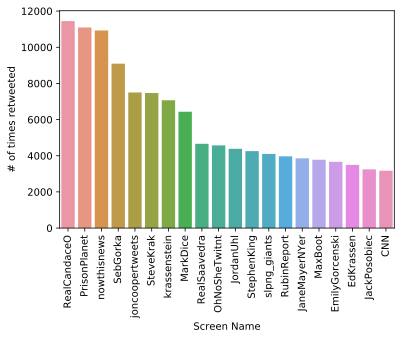

In [15]:
top_20_bar = sns.barplot(x = top_20_retweeted['retweet_screen_name'], y=top_20_retweeted['is_retweet'])

top_20_bar.set(xlabel='Screen Name', ylabel='# of times retweeted')
top_20_bar.set_xticklabels(labels = labels_top_20, rotation=90);

I'll come back to fix this, but even now, you can see that the influence is clear for some accounts

In [16]:
top_50_retweeted

retweet_screen_name  is_retweet
7120         RealCandaceO       11449
6879         PrisonPlanet       11093
14059         nowthisnews       10927
7773             SebGorka        9092
12583     joncoopertweets        7500
8141            SteveKrak        7471
12939        krassenstein        7066
5607             MarkDice        6432
7155         RealSaavedra        4659
6418        OhNoSheTwitnt        4572
4492            JordanUhl        4382
8117          StephenKing        4254
15267        slpng_giants        4101
7509          RubinReport        3967
4134        JaneMayerNYer        3857
5725              MaxBoot        3780
2842       EmilyGorcenski        3665
2768            EdKrassen        3491
4045         JackPosobiec        3247
1474                  CNN        3170
4545            JuddLegum        3080
16172      washingtonpost        3076
2172          DailyCaller        3012
6907        ProudResister        2791
9213          Vicky4Trump        2627
11969       heyitsCarolyn        2504
851             B52Malmet        2436
33          1776Stonewall        2258
10163          benshapiro        2175
13720                mmfa        2102
13945      ndrew_lawrence        2039
1656            Cernovich        2018
13991         nickmon1112        1987
13389       marklevinshow        1974
764        ArthurSchwartz        1808
4012        JRubinBlogger        1794
13705              mjfree        1761
8682       TheRickyDavila        1694
698         AnthemRespect        1638
9881      andrewdoyle_com        1637
841       AynRandPaulRyan        1463
3177      FullFrontalSamB        1421
8575       TheChrisSuprun        1399
7862        SheriffClarke        1379
9302           WajahatAli        1368
277                 AC360        1364
11649              funder        1328
2876       EricRWeinstein        1319
13478        maydaymindy9        1299
1284        BreitbartNews        1290

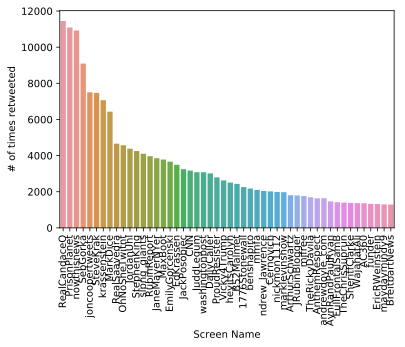

In [17]:
top_50_bar = sns.barplot(x = top_50_retweeted['retweet_screen_name'], y=top_50_retweeted['is_retweet'])


top_50_bar.set(xlabel='Screen Name', ylabel='# of times retweeted')
top_50_bar.set_xticklabels(labels = labels_top_50, rotation=90);


In [18]:
df_all_tucker.head()

tweet_id             user_id  \
0  1108898530125668352  819975326663114754   
1  1108898518821933056          1908173622   
2  1108898513805627397           578116913   
3  1108898512798957568          3298861641   
4  1108898512173977605          2425284969   

                          display_name    screen_name  \
0                               Sheryl     Sheryl2100   
1  ‚ùåYoo Hoo ‚úùÔ∏è Ecc 10:2 üá∫üá∏    Pro 15:3  Watchman4the1   
2                         Samuel Adams     jgrissom63   
3                               ‡§∞‡§æ‡§ß‡§ø‡§ï‡§æ      nakiarn25   
4                       shaivon Cherry     sherryw329   

                       tweet_date  \
0  Fri Mar 22 01:09:46 +0000 2019   
1  Fri Mar 22 01:09:43 +0000 2019   
2  Fri Mar 22 01:09:42 +0000 2019   
3  Fri Mar 22 01:09:42 +0000 2019   
4  Fri Mar 22 01:09:42 +0000 2019   

                                           main_text  fav_count  rt_count  \
0  RT @JuddLegum: .@progressive quietly stopped a...          0       535   
1  @TuckerCarlson &amp; @seanhannity&gt;&gt;&gt; ...          0         0   
2  @marklevinshow Sorry but like thousands others...          0         0   
3  RT @JuddLegum: .@progressive quietly stopped a...          0       535   
4  RT @JuddLegum: .@progressive quietly stopped a...          0       535   

   followers_count  is_verified  reply_to_tweet_id  reply_to_user_id  \
0              220        False                NaN               NaN   
1             3440        False                NaN        22703645.0   
2             2568        False       1.108851e+18        38495835.0   
3               62        False                NaN               NaN   
4              492        False                NaN               NaN   

  reply_to_screen_name                                       retweet_text  \
0                 None  .@progressive quietly stopped advertising on T...   
1        TuckerCarlson                                                NaN   
2        marklevinshow                                                NaN   
3                 None  .@progressive quietly stopped advertising on T...   
4                 None  .@progressive quietly stopped advertising on T...   

     retweet_id  retweet_user_id retweet_screen_name retweet_is_verified  \
0  1.108893e+18       15464697.0           JuddLegum                True   
1           NaN              NaN                 NaN                 NaN   
2           NaN              NaN                 NaN                 NaN   
3  1.108893e+18       15464697.0           JuddLegum                True   
4  1.108893e+18       15464697.0           JuddLegum                True   

   retweet_fav_count  retweet_followers_count quoted_text  quoted_id  \
0             1035.0                 337485.0         NaN        NaN   
1                NaN                      NaN         NaN        NaN   
2                NaN                      NaN         NaN        NaN   
3             1035.0                 337485.0         NaN        NaN   
4             1035.0                 337485.0         NaN        NaN   

   quoted_user_id quoted_screen_name quoted_is_verified  quoted_fav_count  \
0             NaN                NaN                NaN               NaN   
1             NaN                NaN                NaN               NaN   
2             NaN                NaN                NaN               NaN   
3             NaN                NaN                NaN               NaN   
4             NaN                NaN                NaN               NaN   

   is_retweet  is_quote  
0           1         0  
1           0         0  
2           0         0  
3           1         0  
4           1         0